In [17]:
from pyperplan import _parse, _ground
from argparse import ArgumentParser
import networkx as nx
import numpy as np
import os

from scipy.stats import spearmanr
from dotenv import find_dotenv, load_dotenv

from settings import ROOT_DIR

from alex_code.evaluate_embeddings import load_embeddings
from alex_code.utils.save import read_pickle
from alex_code.utils.similarity import cosine_similarity



In [4]:
problem_path = "logistics/43/problogistics-6-1.pddl"
domain_path = "logistics/43/domain.pddl"
d = 128
l = 80
r = 10
k = 10
e = 1
p = 1
q = 1

In [15]:
load_dotenv(find_dotenv(), override=True)

pddl_dir = os.environ.get("PDDL_DIR")
pddl_dir = os.path.join(ROOT_DIR, pddl_dir)

domain_file = os.path.join(pddl_dir, domain_path)
problem_file = os.path.join(pddl_dir, problem_path)

problem = _parse(domain_file=domain_file, problem_file=problem_file)
task = _ground(problem)

problem_name = os.path.basename(problem_path).split(".")[0]

embedding_dir = os.environ.get("EMBEDDINGS_DIR")
embedding_dir = os.path.join(ROOT_DIR, embedding_dir, os.path.dirname(problem_path))
embedding_file = os.environ.get("EMBEDDING_FILE")

embedding_path = os.path.join(embedding_dir, embedding_file.format(problem_name=problem_name, d=d,  l=l, r=r, k=k,
                                                                  e=e, p=p, q=q))

graph_dir = os.environ.get("GRAPHS_DIR")
graph_dir = os.path.join(ROOT_DIR, graph_dir, os.path.dirname(problem_path))

goal_file = os.environ.get("GOAL_FILE")
goal_file = os.path.join(graph_dir, goal_file)

goal_idx = read_pickle(goal_file)["idx"]

In [8]:
embeddings = load_embeddings(embedding_path)

In [21]:
goal_embedding = embeddings[goal_idx]
similarities = []
distances = []

for i in range(len(embeddings)):
    sim = cosine_similarity(embeddings[i], goal_embedding)
    similarities.append(sim)
    dist = np.linalg.norm(embeddings[i] - goal_embedding)
    distances.append(dist)
    
similarities = np.array(similarities)
distances = np.array(distances)

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

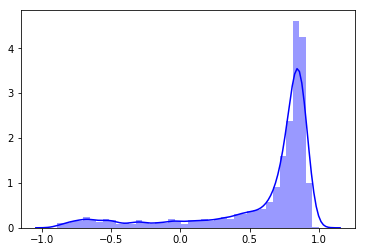

In [20]:
fig = plt.figure()

ax = fig.add_subplot(111)
sns.distplot(similarities, color="blue")

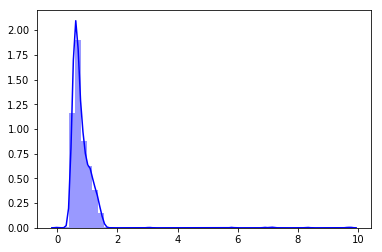

In [22]:
fig = plt.figure()

ax = fig.add_subplot(111)
sns.distplot(distances, color="blue")